# Task 4.9 Part 2

### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Turn project folder path into a string
path = r'C:\Users\marze\CF Projects\08-2024 Instacart Basket Analysis'

In [7]:
# importing dataframe
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

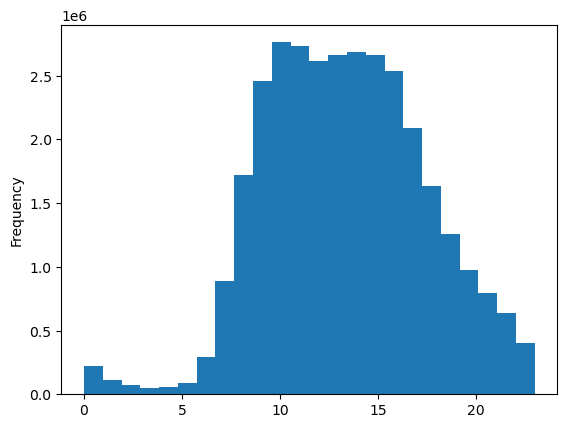

In [9]:
hist = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

The histogram demonstrates the busiest hours of each day. From the histogram we can see that the most orders are placed between the hours of 8am and 4pm.

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

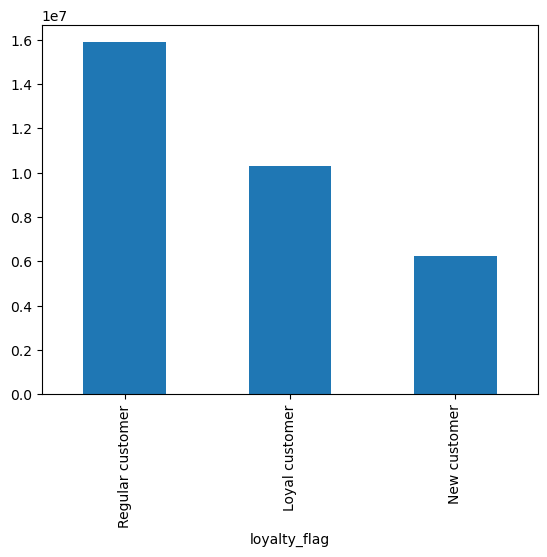

In [12]:
bar = cust_ords_prods['loyalty_flag'].value_counts().plot.bar()

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [17]:
# Create a random sample. Set the seed.
np.random.seed(4)

In [21]:
# Create a dev list based on the 70/30 data split
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [23]:
# split the dataframe into two samples
big = cust_ords_prods[dev]
small = cust_ords_prods[~dev]

In [27]:
# check length of full dataframe
len(cust_ords_prods)

32404859

In [29]:
# check sum length of two samples
len(big)+len(small)

32404859

In [31]:
# create new dataframe only containing prices only and order_hour_of_day columns
df_2 = small [['order_hour_of_day','prices']]

In [33]:
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


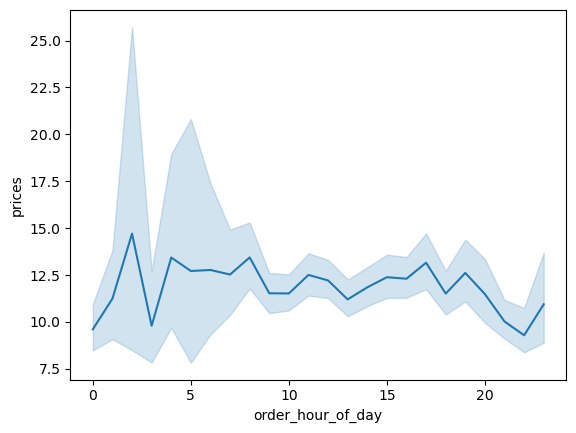

In [37]:
# create line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. 
In a markdown cell beneath your line chart, describe what the line chart shows.

In [40]:
# create new dataframe only containing only age and number_of_dependents columns
df_3 = small [['age','number_of_dependents']]

In [42]:
df_3.head()

,age,number_of_dependents
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


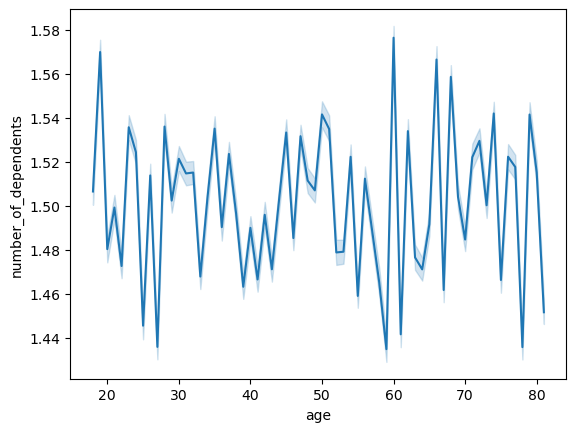

In [46]:
#creating a line chart
line_age_nod = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependents')

There is no clear relationship between age and number_of_dependents.

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. 
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [50]:
#create a dataframe only including age and income
df_4 = small [['age','income']]

In [52]:
df_4.head()

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573


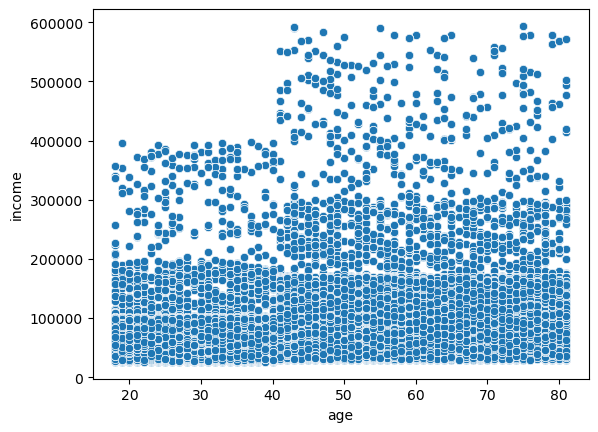

In [54]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='age', y='income', data=df_4)

Starting at around age 40 we see a significant increase in the income for the older age groups. This could lead us to believe that as the age increases, the income increases as well, however, additional analysis would be necessary to confirm this hypothesis. 

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [60]:
#export and save images
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [16]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [64]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [66]:
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependents.png'))

In [70]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income_scatter.png'))